In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import os
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from keras import  Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from keras.models import load_model

import cv2
from cv2 import imshow
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
NO_CLASSES = 2
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Images',
                                                        target_size=(224,224),
                                                        color_mode='rgb',
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=True)

Found 100 images belonging to 2 classes.


In [6]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
x = model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(NO_CLASSES, activation='softmax')(x)
model = Model(model.input, preds)

# don't train the first 19 layers - 0-18 (Because VGG16 is a pretrained model and first 19 layers are pretrained to learn the features from images)
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True

58889256/58889256 [==============================] - 4s 0us/step


In [7]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [8]:
model.fit(x=train_generator,
  batch_size = 1,
  verbose = 1,
  epochs = 20)


Epoch 1/20
4/4 [==============================] - 55s 7s/step - loss: 8.5248 - accuracy: 0.5200
Epoch 2/20
4/4 [==============================] - 1s 130ms/step - loss: 2.8118 - accuracy: 0.7200
Epoch 3/20
4/4 [==============================] - 1s 193ms/step - loss: 0.0858 - accuracy: 0.9600
Epoch 4/20
4/4 [==============================] - 1s 126ms/step - loss: 0.1686 - accuracy: 0.9600
Epoch 5/20
4/4 [==============================] - 1s 124ms/step - loss: 0.0928 - accuracy: 0.9700
Epoch 6/20
4/4 [==============================] - 1s 154ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 1s 202ms/step - loss: 0.0297 - accuracy: 0.9900
Epoch 8/20
4/4 [==============================] - 1s 199ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 1s 149ms/step - loss: 2.0508e-04 - accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 1s 145ms/step - loss: 2.4178e-05 - accuracy: 1.0000
Epoch 11/20
4

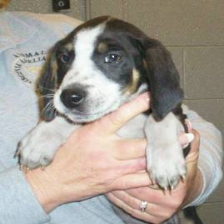

1/1 [==============================] - 1s 807ms/step
[[3.6934253e-12 1.0000000e+00]]
1
Predicted : Dog



In [11]:
class_dictionary = {0:'Cat',
              1:'Dog'}
imgtest = cv2.imread('/content/drive/MyDrive/Images/DOG/dog.10.jpg',cv2.IMREAD_UNCHANGED)
size = (224, 224)
imgtest = cv2.resize(imgtest, size) 

# prepare the image for prediction
x = imgtest
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.imagenet_utils.preprocess_input(x)

 # making prediction
cv2_imshow(imgtest)
predicted_prob = model.predict(x)
print(predicted_prob)
print(predicted_prob[0].argmax())
print("Predicted : " + class_dictionary[predicted_prob[0].argmax()])
print("============================\n")

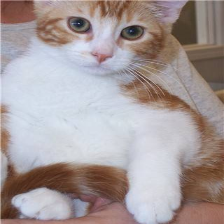

1/1 [==============================] - 0s 28ms/step
[[1.0000000e+00 2.6855156e-08]]
0
Predicted : Cat



In [12]:
imgtest = cv2.imread('/content/drive/MyDrive/Images/CAT/cat.9.jpg')
image_array = np.array(imgtest, "uint8")
size = (224, 224)
imgtest = cv2.resize(imgtest, size) 

# prepare the image for prediction
x = imgtest
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.imagenet_utils.preprocess_input(x)

 # making prediction
cv2_imshow(imgtest)
predicted_prob = model.predict(x)
print(predicted_prob)
print(predicted_prob[0].argmax())
print("Predicted : " + class_dictionary[predicted_prob[0].argmax()])
print("============================\n")